# Toxin expression in snake venom evolves rapidly with constant shifts in evolutionary rates
Researchers wanted to determine whether the evolution of snake venom influenced the overall evolution of snakes and to understand how venom gene expression has shifted over time. They measured the expression levels of 27 venom genes across 52 snake species and mapped this data onto a phylogenetic tree of snake evolution. By comparing the phylogeny of snake venom gene expression, they were able to uncover patterns of evolutionary change linked to snake venom. 

## Research Questions, Data, & Figures
**Data Set:** https://royalsocietypublishing.org/doi/full/10.1098/rspb.2020.0613#d1e1203 <br>
> In this paper, researchers wanted to see whether snake evolution is due to the evolution of snake venom by looking at snake venom gene expression. Data was gathered from 52 different venomous snake species such as their snake family and gene expression for 27 toxins. In total, there were 52 observations and 28 features. They also used already known phylogenetic trees of snakes to see the relationship between the known evolutionary history and the gene expression rate shifts. <br>
**Research Questions:** The question that the authors were trying to answer was if the evolution in snake venom played a role in the overall evolution of snakes and if so, in what way. Since each toxin/venom is controlled by its own gene, they can measure the gene expression and observe how it may have changed over time. To do this, they used an already established phylogenetic tree for snake species and mapped the gene expression data onto it. For example, they compared the gene expression for an ancestor snake versus a modern snake. Since they know that the modern snake derived from the ancestor snake, they can look at the differences in gene expression for each toxin and make conclusions. Another research question using this data could be how the gene expression data on venom correlate to the snakes’ role in nature? Do certain species that hunt a specific way exhibit a trend in gene expression for specific toxins? It’s possible that species that hunt the same way would evolve to have the same kind of expression for venom since that is what they use to capture prey. This data would help with this analysis because it provides the gene expression on the different toxins along with the species of snakes observed.

**Figure 1. from Barua & Mikheyev 2020** <br>
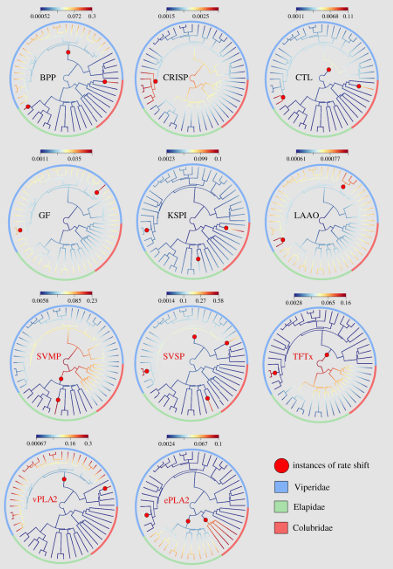 <br>
> This figure shows the evolution of the venomous snakes based on different venom genes. The red dots indicate rate shifts where the gene expression changed significantly. The colors of the branches indicate the rate of change: blue for slower evolutionary rates to red for high evolutionary rates. The bordering circle indicate the 3 snake families of the species. The figure shows that each venom gene has its own evolutionary path with di erent instances of rate shift. Researchers are able to see that there are periods of time in the evolution of these species where gene expression of certain venom change drastically. From this figure, we can conclude that snake venom evolution is not linear and may shift from a slower rate to a faster rate or vice versa. Additionally, the different venom have di erent rates during different points in the tree. This indicates that these genes underwent di erent selective pressures such as a new environment or new prey.

**Figure 2. from Barua & Mikheyev 2020** <br>
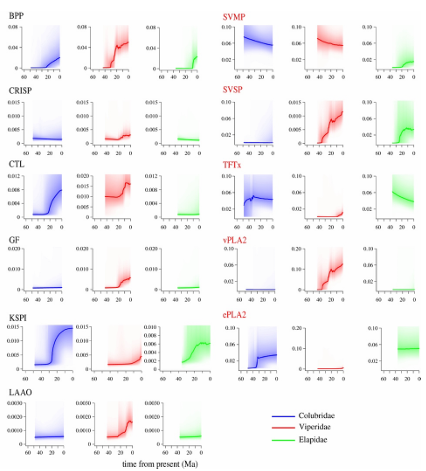 <br>
> This figure shows the evolutionary rate of each venom gene corresponding to the 3 snake families. The x-axis represents the time from present in Ma which is 1 million years. The y-axis is the rate of trait evolution which indicate how fast or slow the gene expression changed. The colors show the snake families: blue is Colubridae, red is Viperidae, and green is Elapidae. The figure shows that each snake family evolve di erent traits over time. It supports the hypothesis that evolutionary pressure on gene expression on snake venom plays a role in the evolution of snakes. From the figure we can see that for example, in the SVSP gene, Viperidae family evolved to have a higher expression of this gene.

**Another Figure:**
An additional figure I can create that would be useful for understanding this data would be one that shows the average gene expression of each toxin for each snake family. This would help show which gene is highly expressed for each family and how it might be favored within that family. It could be like a heat map. The horizontal axis would be the different venom genes and the vertical axis would have the 3 snake families. Each box would be colored based on the average gene expression level: the lighter color = low expression, darker color = higher expression. It could all be red but the gene expression would vary and be different opacities.  

#### My Chosen Data: Supplementary Data <br>
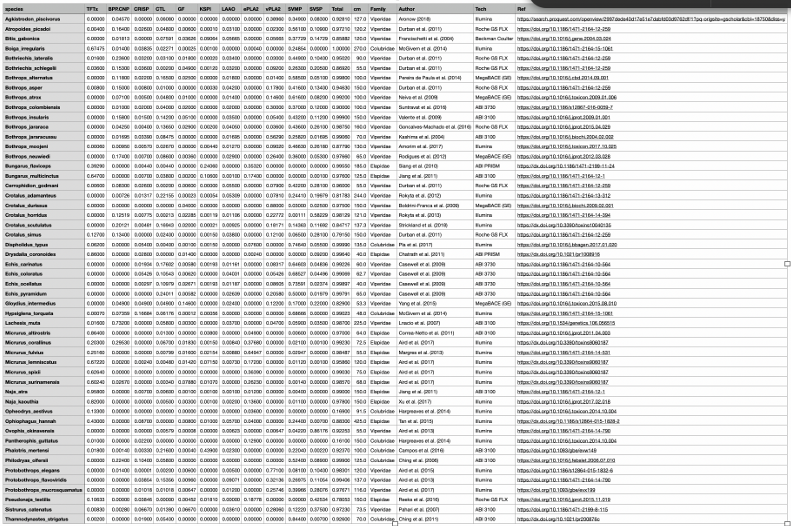 <br>
> There are 52 rows which contain the snake species and 17 columns which contain the different venom genes, the snake family, along with meta data such as the technology used to acquire the info and reference. This table 
shows the actual data used to create the figures in the paper. For example, the gene expression values were used to calculate when the rate shifts happened. The data file itself is a csv file which means that the information is comma separated. 

# Data Cleaning and Exploration
## Loading and Cleaning Data
1. Click on the github link in the 'Data Accesibility' section of the paper: https://agneeshbarua.github.io/venom-phenotype-evolution/
2. Locate 'Supplementary Table 1': since there was no way to download the table, I had a friend help me obtain it using the code below (Courtesy of Dan Nguyen, CS Grad Student @UMass Lowell). Essentially what is does is it reads through the url webpage and finds the table, then it creates a dataframe with that table using pandas. It will then output a csv file named "vPhen_data.csv" which will be comma separated and ready to be loaded in. The file is added to GitHub for easy access.

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

URL = r"https://agneeshbarua.github.io/venom-phenotype-evolution"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

# get the table - there is only 1 on the page
table = soup.find(lambda tag: tag.name=='table')

# columns for panda dataframe
columns = []

# extract table headers
table_headers = table.find_all('th')

for header in table_headers:
    try:
        columns.append(header.get_text().strip())
    except:
        continue

# pandas data
data = []

# get the table body
table_body = soup.find(lambda tag: tag.name == 'tbody')

# extract all the table rows
table_rows = table_body.find_all('tr')

# get rowsof table
for row in table_rows:
    # create a single row in pandas
    pd_row = []
    for val in row.find_all('td'):
        try:
            pd_row.append(val.get_text().replace('\n', ''))
        except:
            pd_row.append('')
    # add it to all the data (rows) of pandas
    data.append(pd_row)

df = pd.DataFrame(data = data, columns=columns)

df.to_csv("vPhen_data.csv", index=False)

3. A dataframe called vPhen is created by loading the data file in using pandas read_csv. This csv file has to be in the same directory as the Jupyter notebook.

In [21]:
vPhen = pd.read_csv("vPhen_data.csv", index_col=0) #index_col=0 is used to make the first column the index of the table which is the species
vPhen.head()

,TFTx,BPP.CNP,CRISP,CTL,GF,KSPI,LAAO,ePLA2,vPLA2,SVMP,SVSP,Total,cm,Family,Author,Tech,Ref
species,,,,,,,,,,,,,,,,,
Agkistrodon_piscivorus,0.00000,0.04570,0.00000,0.06080,0.00000,0.00000,0.00000,0.0000,0.38960,0.34900,0.08300,0.92810,127.0,Viperidae,Aronow (2018),Illumina,https://search.proquest.com/openview/2997dede4...
Atropoides_picadoi,0.00400,0.16400,0.02600,0.04800,0.00600,0.00010,0.03100,0.0000,0.02300,0.56100,0.10900,0.97210,120.2,Viperidae,Durban et al. (2011),Roche GS FLX,https://doi.org/10.1186/1471-2164-12-259
Bitis_gabonica,0.00000,0.01813,0.00000,0.07591,0.03626,0.09064,0.05665,0.0000,0.05665,0.37729,0.14729,0.85882,120.0,Viperidae,Francischetti et al. (2004),Beckman Coulter,https://doi.org/10.1016/j.gene.2004.03.024
Boiga_irregularis,0.67475,0.01400,0.03835,0.02271,0.00025,0.00100,0.00000,0.0004,0.00000,0.24854,0.00000,1.00000,270.0,Colubridae,McGivern et al. (2014),Illumina,https://doi.org/10.1186/1471-2164-15-1061
Bothriechis_lateralis,0.01600,0.23600,0.03200,0.03100,0.01800,0.00020,0.03400,0.0000,0.03000,0.44900,0.10400,0.95020,90.0,Viperidae,Durban et al. (2011),Roche GS FLX,https://doi.org/10.1186/1471-2164-12-259


In [26]:
vPhen.shape 

(52, 17)

This table contains 52 observations which are the different snake species. It contains 17 features which include: 11 venom genes, total venom gene expression, cm (centimorgan) frequency of genetic recombination, the snake family, author that obtained the data, technology used to obtain the data, and the reference.

# Two Features to Investigate
### SVMP gene expression
**Expectation:** Based on Figure 2, if I grouped the species based on their family and then looked at the mean values of SVMP gene expression, I should see that the *Colubridae* and *Viperidae* family have similar mean values. This is because in Figure 2, they both have a similar trend in SVMP gene expression  over the years. <br>

**Results:** The results match my expectation with the mean gene expression of SVMP being similar with the *Colubridae* and *Viperisae* family. Based on the output, the mean SVMP expression is 0.408750 for *Colubridae*, 0.025236 for *Elapidae*, and 0.349595 for *Viperidae*.

In [151]:
vPhen.groupby('Family')['SVMP'].describe() #groups the observations by 'Family' column and uses the describe function on just the 'KSPI' column to get the mean

,count,mean,std,min,25%,50%,75%,max
Family,,,,,,,,
Colubridae,8.0,0.408750,0.335785,0.00000,0.165300,0.38627,0.701595,0.84400
Elapidae,13.0,0.025236,0.066374,0.00000,0.000000,0.00400,0.011200,0.24400
Viperidae,31.0,0.340505,0.208769,0.00111,0.156815,0.37000,0.457650,0.73591


### SVSP gene expression 
**Expectation:** Based on Figure 2, if I grouped the species based on their family and then looked at the mean values of SVSP gene expression, I should see that the *Viperidae* family has a higher mean than the *Colubridae* and *Elapidae* family. This is because in Figure 2, *Viperidae* has the highest overall SVSP expression over the years. <br>

**Results:** The results match my expectation with the mean gene expression of SVSP being highest with the *Viperidae* family. Based on the output, the mean SVSP expression is 0.019150 for *Colubridae*, 0.040565 for *Elapidae*, and 0.172579 for *Viperidae*.

In [47]:
vPhen.groupby('Family')['SVSP'].describe() #groups the observations by 'Family' column and uses the describe function on just the 'SVSP' column to get the mean

,count,mean,std,min,25%,50%,75%,max
Family,,,,,,,,
Colubridae,8.0,0.019150,0.033945,0.00000,0.000,0.0011,0.0190,0.08900
Elapidae,13.0,0.040565,0.118335,0.00000,0.000,0.0000,0.0010,0.42534
Viperidae,31.0,0.172579,0.178442,0.01695,0.052,0.1120,0.2405,0.86176


# Visualizations
### Figure 1. SVMP Gene Expression Across Snake Families <br>
> A boxplot is created to show the median SVMP gene expression values across the 3 snake species. The boxplot shows the general distribution of where 25%/50%/75% of the snake family lies for SVMP expression and identifies any outliers. This is a great plot to compare the mean values between the families. <br>
> **Explanation:** It can be seen that the middle line in the boxes (median) of Viperidae and Colubridae are very close in value. This matches what I found when I ran the describe function earlier where the mean values were 0.408750 for *Colubridae* and 0.340505 for *Viperidae*. Another observation is that *Elapidae* SVMP gene expression is close to zero. This relates to the hypothesis that venom gene expression may bring insights to snake evolution because based on this plot, it looks like the *Viperidae* and *Colubridae* snake family may be more closely related than *Elapidae*. For example, their SVMP expression may be similar indicating they are closer on the phylogenetic tree whereas the *Elapidae* family may have diverged and lost the need for the expression of SVMP.

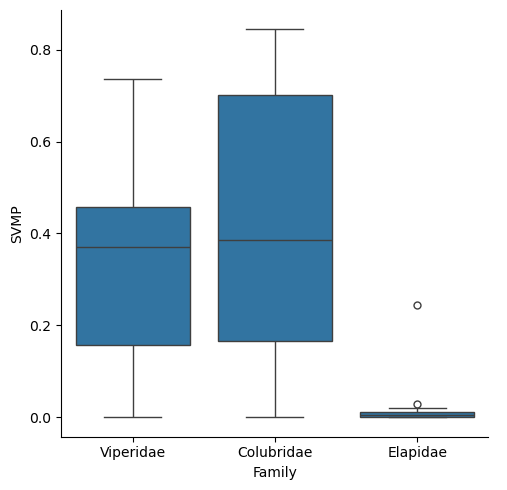

In [165]:
import seaborn as sns
sns.catplot(data=vPhen, x='Family', y='SVMP', kind='box') 
#A categorical plot was created using the vPhen dataframe with the x-axis as the Family column, the y-axis as the SVMP column (gene expression value), and the kind of plot as a boxplot

### Figure 2. SVSP Gene Expression Across Snake Families <br>
> A boxplot is created to show the median SVSP gene expression values across the 3 snake species. The boxplot shows the general distribution of where 25%/50%/75% of the snake family lies for SVSP expression and identifies any outliers. This is a great plot to compare the mean values between the families. <br>
> **Explanation:** It can be seen that the middle of the box (median) is highest in the *Viperidae* family. This matches what I found when I ran the describe function for the SVSP expression values: 0.172579 for *Viperidae*, 0.019150 for *Colubridae*, and 0.040565 for *Elapidae*. This relates to the hypothesis that venom gene expression may bring insights to snake evolution because it may show the divergence of the *Viperidae* family from the *Colubridae* and *Elapidae* family. There may have been some evolutionary history that caused the *Viperidae* snakes to develop higher SVSP gene expression.

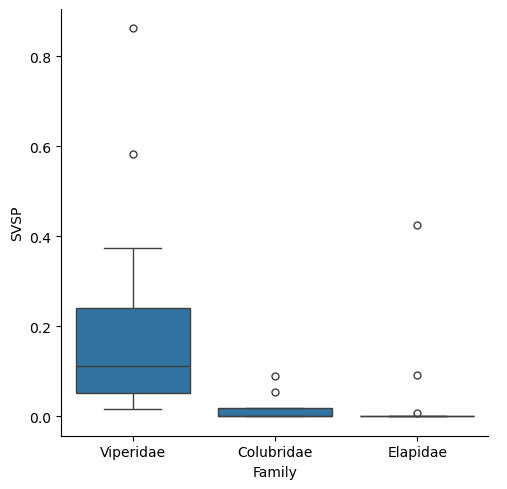

In [167]:
sns.catplot(data=vPhen, x='Family', y='SVSP', kind='box')
#A categorical plot was created using the vPhen dataframe with the x-axis as the Family column, the y-axis as the SVSP column (gene expression value), and the kind of plot as a boxplot